### Student Information
Name: 黃苡溱

Student ID: 112065534

GitHub ID: blackanana

Kaggle name: blackanana

Kaggle private scoreboard snapshot: 

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

## Table of Contents
1. Data Preprocessing
2. Model Selection
3. Inference & Performance

---
## 1. Data Preprecessing
### 1.1 Load Data
a) Load 'tweets_DM.json' and save as dataframe.

In [16]:
### Begin Assignment Here
import pandas as pd
import json

with open('/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/tweets_DM.json', 'r' , encoding='utf-8') as file:
    lines=file.readlines()

data=[]
for line in lines:
    json_data=json.loads(line)
    data.append(json_data)
    
all_df = pd.DataFrame(data)

first_columns = ["_score", "_index", "_source", "_crawldate", "_type"]
all_df = all_df[first_columns]
all_df.columns = all_df.columns.str.replace('_', '')

print(all_df.head())

   score           index                                             source  \
0    391  hashtag_tweets  {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1    433  hashtag_tweets  {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2    232  hashtag_tweets  {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3    376  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4    989  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   

             crawldate    type  
0  2015-05-23 11:42:47  tweets  
1  2016-01-28 04:52:09  tweets  
2  2017-12-25 04:39:20  tweets  
3  2016-01-24 23:53:05  tweets  
4  2016-01-08 17:18:59  tweets  


b) Utilizing 'json_normalize' to flatten it because the 'source' column contains information structured across multiple fields.

In [17]:
from pandas import json_normalize
result = json_normalize(all_df['source'])
result.columns = ['tweet_hashtags', 'tweet_id', 'tweet_text']
all_df = pd.concat([all_df, result], axis=1)

all_df.head()

,score,index,source,crawldate,type,tweet_hashtags,tweet_id,tweet_text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [18]:
all_df.shape

(1867535, 8)

In [19]:
# delete 'source' column
all_df.drop('source', axis=1, inplace=True)

# replace list to string in 'tweet_hashtags' column due to []
all_df['tweet_hashtags'] = all_df['tweet_hashtags'].apply(lambda x: ', '.join(x) if x else '')
all_df.head()

,score,index,crawldate,type,tweet_hashtags,tweet_id,tweet_text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,Snapchat,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"freepress, TrumpLegacy, CNN",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,bibleverse,0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,,0x2de201,"""Trust is not the same as faith. A friend is s..."


c) Merge the emotion and identification data.

In [20]:
# 合併 emotion 與 identification 資料
emotion_df = pd.read_csv('/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/emotion.csv')
identification_df = pd.read_csv('/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/data_identification.csv')

all_df = pd.merge(all_df, emotion_df, on='tweet_id', how='left')
all_df = pd.merge(all_df, identification_df, on='tweet_id', how='left')

In [21]:
all_df.head()
# print(all_df.shape)

,score,index,crawldate,type,tweet_hashtags,tweet_id,tweet_text,emotion,identification
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,Snapchat,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"freepress, TrumpLegacy, CNN",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,bibleverse,0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,,0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test


### 1.2 Exploratory Data Analysis, EDA
a) Inspecting columns and handling them.

In [23]:
duplicate_data=all_df

# change the position of 'tweet_id' column
tweet_id_column=duplicate_data.pop('tweet_id')
duplicate_data.insert(0, 'tweet_id', tweet_id_column)

# drop columns with identical values in each row
duplicate_data.pop('type')
duplicate_data.pop('index')

duplicate_data.head()

,tweet_id,score,crawldate,tweet_hashtags,tweet_text,emotion,identification
0,0x376b20,391,2015-05-23 11:42:47,Snapchat,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,0x2d5350,433,2016-01-28 04:52:09,"freepress, TrumpLegacy, CNN","@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,0x28b412,232,2017-12-25 04:39:20,bibleverse,"Confident of your obedience, I write to you, k...",NaN,test
3,0x1cd5b0,376,2016-01-24 23:53:05,,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
4,0x2de201,989,2016-01-08 17:18:59,,"""Trust is not the same as faith. A friend is s...",NaN,test


b) Emotion Distribution Analysis

Analyzes emotion distribution, displays percentages in a histogram.

Emotion:anticipation, Count:248935
Emotion:sadness, Count:193437
Emotion:fear, Count:63999
Emotion:joy, Count:516017
Emotion:anger, Count:39867
Emotion:trust, Count:205478
Emotion:disgust, Count:139101
Emotion:surprise, Count:48729
Count of NaN in 'emotion' column: 411972


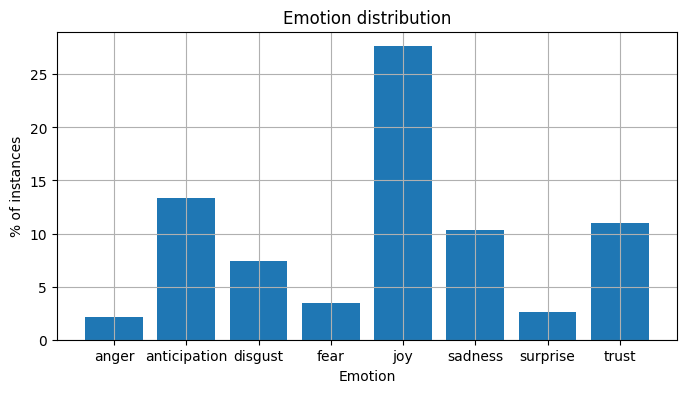

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

emotions = ['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust', 'disgust', 'surprise'] # 8
for emotion in emotions:
    count=(duplicate_data['emotion'] == emotion).sum()
    print(f"Emotion:{emotion}, Count:{count}")
count_nan = pd.isnull(duplicate_data['emotion']).sum()
print(f"Count of NaN in 'emotion' column: {count_nan}")

# the histogram of the data
labels = duplicate_data['emotion'].unique()
post_total = len(duplicate_data)
df1 = duplicate_data.groupby(['emotion']).count()['tweet_text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(8,4))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

c) Splitting Data for Training and Prediction.

In [24]:
from sklearn.model_selection import train_test_split
training_df = duplicate_data[duplicate_data['identification'] == 'train']
predicting_df = duplicate_data[duplicate_data['identification'] == 'test']

In [25]:
predicting_df.pop('identification')
# training_df.pop('identification')
predicting_df.head()

,tweet_id,score,crawldate,tweet_hashtags,tweet_text,emotion
2,0x28b412,232,2017-12-25 04:39:20,bibleverse,"Confident of your obedience, I write to you, k...",NaN
4,0x2de201,989,2016-01-08 17:18:59,,"""Trust is not the same as faith. A friend is s...",NaN
9,0x218443,66,2015-09-09 09:22:55,"materialism, money, possessions",When do you have enough ? When are you satisfi...,NaN
30,0x2939d5,104,2015-10-10 14:33:26,"GodsPlan, GodsWork","God woke you up, now chase the day #GodsPlan #...",NaN
33,0x26289a,310,2016-10-23 08:49:50,,"In these tough times, who do YOU turn to as yo...",NaN


In [27]:
print(training_df.shape)
print(predicting_df.shape)

(1455563, 6)
(411972, 6)


d) Handling Imbalance in Training Data.

In [29]:
import pandas as pd

parameters = {
    "seed": 1111,
}

grouped = training_df.groupby('emotion')
train_sample_df = pd.DataFrame()

for emotion, group in grouped:
    shuffled_group = group.sample(frac=1, random_state=parameters['seed'])
    sampled_group = shuffled_group.head(39867)
    train_sample_df = pd.concat([train_sample_df, sampled_group])

train_sample_df = train_sample_df.sample(frac=1, random_state=parameters['seed']).reset_index(drop=True)

Emotion:anticipation, Count:39867
Emotion:sadness, Count:39867
Emotion:fear, Count:39867
Emotion:joy, Count:39867
Emotion:anger, Count:39867
Emotion:trust, Count:39867
Emotion:disgust, Count:39867
Emotion:surprise, Count:39867
Count of NaN in 'emotion' column: 0


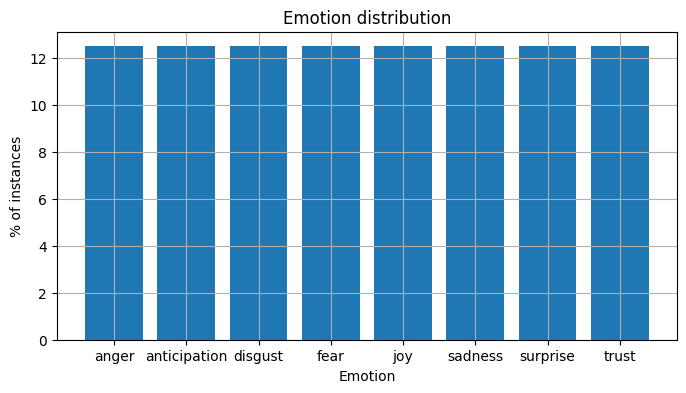

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

emotions = ['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust', 'disgust', 'surprise'] # 8
for emotion in emotions:
    count=(train_sample_df['emotion'] == emotion).sum()
    print(f"Emotion:{emotion}, Count:{count}")
count_nan = pd.isnull(train_sample_df['emotion']).sum()
print(f"Count of NaN in 'emotion' column: {count_nan}")

# the histogram of the data
labels = train_sample_df['emotion'].unique()
post_total = len(train_sample_df)
df1 = train_sample_df.groupby(['emotion']).count()['tweet_text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(8,4))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

e) Emotion Mapping and Representation Analysis

In [31]:
emotion_mapping = {
    0: 'anticipation',
    1: 'sadness',
    2: 'fear',
    3: 'joy',
    4: 'anger',
    5: 'trust',
    6: 'disgust',
    7: 'surprise'
}

reverse_emotion_mapping = {v: k for k, v in emotion_mapping.items()}

train_sample_df['emotion'] = train_sample_df['emotion'].map(reverse_emotion_mapping)

print(train_sample_df[['emotion', 'emotion']].head())

counts = train_sample_df['emotion'].value_counts().sort_index()
for integer_repr, count in counts.items():
    emotion = emotion_mapping[integer_repr]
    print(f"Integer Representation: {integer_repr} -> Emotion: {emotion} -> Count: {count}")

   emotion  emotion
0        1        1
1        7        7
2        6        6
3        1        1
4        0        0
Integer Representation: 0 -> Emotion: anticipation -> Count: 39867
Integer Representation: 1 -> Emotion: sadness -> Count: 39867
Integer Representation: 2 -> Emotion: fear -> Count: 39867
Integer Representation: 3 -> Emotion: joy -> Count: 39867
Integer Representation: 4 -> Emotion: anger -> Count: 39867
Integer Representation: 5 -> Emotion: trust -> Count: 39867
Integer Representation: 6 -> Emotion: disgust -> Count: 39867
Integer Representation: 7 -> Emotion: surprise -> Count: 39867


In [32]:
train_sample_df.head()

,tweet_id,score,crawldate,tweet_hashtags,tweet_text,emotion
0,0x38583f,773,2017-09-17 01:05:04,"heartbroken, heartbreak",Tell me there's no point in trying😞 #heartbrok...,1
1,0x2659ff,780,2015-01-03 22:38:06,oldermen,I need an older man tonight. <LH> #oldermen <LH>,7
2,0x26b677,733,2017-10-10 03:39:17,,Shit used to be so good <LH> HAPPENED,6
3,0x267cb0,21,2015-03-10 02:47:39,,@realDonaldTrump I see all the hard work you a...,1
4,0x35b8d9,613,2017-02-17 13:22:15,MondayMotivation,A worn Bible is preventive medicine for what m...,0


f) Splitting Data into Train, Validation, and Test Sets.

In [33]:
train_df, temp_df=train_test_split(train_sample_df, random_state=1111, train_size=0.8)
val_df, test_df = train_test_split(temp_df, random_state=1111, train_size=0.5)

In [ ]:
predicting_df.to_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/prediction_df.pkl") 
train_df.to_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/train_df.pkl") 
test_df.to_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/test_df.pkl") 
val_df.to_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/val_df.pkl") 
combined_val_df = pd.concat([test_df, val_df])
combined_val_df.to_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/combined_df.pkl")

In [6]:
import pandas as pd
predicting_df = pd.read_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/prediction_df.pkl")
train_df = pd.read_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/train_df.pkl")
test_df = pd.read_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/test_df.pkl")
val_df = pd.read_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/val_df.pkl")
combined_val_df = pd.read_pickle("/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/combined_df.pkl")

In [7]:
print("Shape of Prediction df: ", predicting_df.shape)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)
print("Shape of Validation df: ", val_df.shape)
print("Shape of combined_val df: ", combined_val_df.shape)

Shape of Prediction df:  (411972, 6)
Shape of Training df:  (255148, 6)
Shape of Testing df:  (31894, 6)
Shape of Validation df:  (31894, 6)
Shape of combined_val df:  (63788, 6)


---
## 2. Model Selection
### 2.1 Tokenizer
To verify if the model's tokenizer can recognize emojis

In [10]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

train_df['tweet_text'][304910]
tokenizer = AutoTokenizer.from_pretrained('roberta-large')
tokens = tokenizer(train_df['tweet_text'][304910])
decoder_eomji = tokenizer.decode(tokens['input_ids'])
print(decoder_eomji)

<s><LH> but whatever better be 👉🏻 Heartless, no feelings, selfish, #MeMeMe etc 👈🏻😌😚 <LH> #FTheRest</s>


### 2.2 TextClassification
a) Libraries and Functions Import

In [ ]:
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
import pandas as pd
import numpy as np
import evaluate  # Custom module or function (not specified in the provided code)
from tqdm import tqdm
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import create_optimizer
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
from transformers.keras_callbacks import KerasMetricCallback
from transformers.keras_callbacks import PushToHubCallback
from datasets import Dataset
from transformers import AutoTokenizer, ElectraModel

b) Preprocessing Setup

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/electra-small-discriminator")
accuracy = evaluate.load("accuracy")  # Presumably, a function or object to compute accuracy

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
# Load and preprocess training/validation data
train_df = pd.read_pickle('/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/train_df.pkl').reset_index(drop=True)
val_df = pd.read_pickle('/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/combined_df.pkl').reset_index(drop=True)

# Renaming columns for consistency
train_df.rename(columns={'tweet_text':'text', 'emotion': 'label'}, inplace=True)
val_df.rename(columns={'tweet_text':'text', 'emotion': 'label'}, inplace=True)

# Convert pandas DataFrame to Hugging Face Dataset
train_df = Dataset.from_pandas(train_df)
val_df = Dataset.from_pandas(val_df)

# Tokenize the datasets
tokenized_train = train_df.map(
    preprocess_function, batched=True,
    remove_columns=['tweet_id', 'score', 'crawldate']
)
tokenized_val = val_df.map(
    preprocess_function, batched=True,
    remove_columns=['tweet_id', 'score', 'crawldate']
)

d) Model and Training Configuration
- distilbert-base-uncased
- bert-base-uncased  
- roberta-based
- xlm-roberta-base 
- facebook/bart-base
- google/electra-small-discriminator

In [4]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model = AutoModelForSequenceClassification.from_pretrained(
    "google/electra-small-discriminator", num_labels=8
)

training_args = TrainingArguments(
    output_dir="/home/nlplab/emma/DM2023-Lab2-Master/my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=16,
    num_train_epochs=12,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# print(torch.__version__)
# torch.cuda.is_available()

e) Model Training and Saving

In [ ]:
trainer.train()
model.save_pretrained('/home/nlplab/emma/DM2023-Lab2-Master/my_awesome_model/mammamia')

### 2.3 zero-shot-classification

Utilizes the pipeline method from Hugging Face Transformers, specifically employing the "zero-shot-classification" model.   

In [ ]:
from transformers import pipeline
import pandas as pd

from tqdm import tqdm

pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli",device=0)

test_df = pd.read_pickle('/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/prediction_df.pkl').reset_index(drop=True)
# sequence_to_classify = "one day I will see the world"
results = []
candidate_labels = ['anticipation', 'sadness', 'fear', 'joy', 'anger', 'trust', 'disgust', 'surprise']

for index, row in tqdm(test_df.iterrows(), total=len(test_df)):
    sequence_to_classify = row['tweet_text']
    result = pipe(sequence_to_classify, candidate_labels)
    
    predicted_label = result['labels'][0]
    score = result['scores'][0]

    results.append({'id': row['tweet_id'], 'emotion': predicted_label})
    
results_df = pd.DataFrame(results)
results_df.to_csv('predicted_labels.csv', index=False)
# print(result)

### 2.4 Multimodal Prediction
Performs multimodal prediction using AutoGluon, a framework for automating machine learning tasks.

In [ ]:
from autogluon.multimodal import MultiModalPredictor
import pandas as pd

train_df = pd.read_pickle('/home/nlplab/emma/DM2023-eLab2-Master/data/kaggle/train_df.pkl').reset_index(drop=True)
# subsample_size = 100000
# train_df= train_df.sample(n=subsample_size, random_state=0)
columns_to_remove = ['tweet_id', 'score', 'crawldate', 'tweet_hashtags']
train_df = train_df.drop(columns_to_remove, axis=1)

# predictor = MultiModalPredictor(label="emotion", eval_matrix="acc")
predictor = MultiModalPredictor(label="emotion", validation_metric="acc")

predictor.fit(train_df,seed=1314, hyperparameters={
    "model.hf_text.checkpoint_name":"roberta-large",
    "optimization.max_epochs":3,
    "model.hf_text.insert_sep":False,
})

predictor.save("/home/nlplab/emma/DM2023-Lab2-Master/autogluon_model")

---
## 3. Inferene & Performance
### 3.1 TextClassification
a) Inference

In [ ]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm
import torch

def label2class(label):
  l2c = {"LABEL_0": "anticipation", "LABEL_1": "sadness", "LABEL_2":"fear", "LABEL_3":"joy", "LABEL_4":"anger", "LABEL_5":"trust", "LABEL_6":"disgust", "LABEL_7":"surprise"}
  return l2c[label]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

classifier = pipeline("sentiment-analysis",
                      model="/home/nlplab/emma/DM2023-Lab2-Master/model/xlm-roberta-base/my_awesome_model_2/checkpoint-79735",
                      device=0 if device.type == 'cuda' else -1)
test_df = pd.read_pickle('/home/nlplab/emma/DM2023-Lab2-Master/data/kaggle/prediction_df.pkl').reset_index(drop=True)
results = []

for index, row in tqdm(test_df.iterrows(), total=len(test_df)):
    sequence_to_classify = row['tweet_text']
    result = classifier(sequence_to_classify)
    
    predicted_label = result[0]['label']
    predicted_emotion = label2class(predicted_label)
    score = result[0]['score']

    results.append({'id': row['tweet_id'], 'emotion': predicted_emotion})
    
results_df = pd.DataFrame(results)
results_df.to_csv('xlmroberta_f_labels.csv', index=False)

b) Performace  

Up: bert-base-uncased  
Down: distilbert-base-uncased  

![Accuracy1](img/pic1.png)

Last one is zero-shot-classification using facebook/bart-large-mnli

![Accuracy2](img/pic2.png)

### 3.2 Multimodal Prediction

The best score achieved was 0.49481 through Multimodal Prediction. 

![Accuracy3](img/pic3.png)

However, later experimentation with the raw, untreated data inputted into the roberta-large model yielded significantly higher performance compared to the balanced-data scenario. 

This outcome indicates the potential for further exploration and experimentation to enhance the performance, suggesting the existence of more methods to improve the final score.